In [1]:
from royalur import LutAgent
from huggingface_hub import hf_hub_download
import pandas as pd

REPO_ID = "sothatsit/RoyalUr"
FILENAME = "finkel.rgu"
filename = hf_hub_download(repo_id=REPO_ID, filename=FILENAME)
lut_player = LutAgent(filename)
lut = lut_player.lut




In [2]:
lut_df = pd.DataFrame(
    {
        "key": lut.keys_as_numpy(),
        "value": lut.values_as_numpy() / 65535,
    }
)

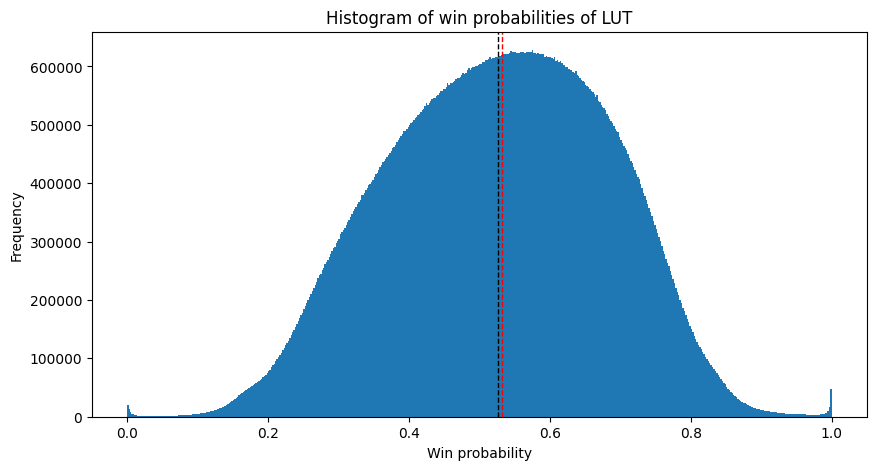

In [3]:
ax = lut_df.value.plot(kind='hist',title='Histogram of win probabilities of LUT', bins=500, figsize=(10, 5))
ax.axvline(lut_df.value.mean(), color='k', linestyle='dashed', linewidth=1)
ax.set_xlabel("Win probability")
ax.set_ylabel("Frequency")
ax.axvline(lut_df.value.median(), color='r', linestyle='dashed', linewidth=1)


In [4]:
# get png as base64
import io
import base64
buf = io.BytesIO()
ax.figure.savefig(buf, format='png')
buf.seek(0)
string = base64.b64encode(buf.read())

In [8]:
import numpy as np
np.histogram(lut_df.value.values, bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

(array([  141441,  1603624,  9222354, 20341375, 27914010, 30958748,
        28164726, 16090624,  3113748,   341366]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [25]:
import plotly.express as px
fig = px.histogram(lut_df, x="value")
fig.show()

In [18]:
from royalur import Game

game = Game.create_finkel(pawns=7)
game.roll_dice(1)
moves = game.find_available_moves()

In [19]:
moves[0].describe()

'Introduce a piece to A4'

In [21]:
print(game.get_board())
b = game.get_board()

....  ..
........
....  ..


royalur.model.board.Board

In [31]:
lut_df.key = lut_df.key.astype(int)

In [36]:
import duckdb

with duckdb.connect('local.db') as con:
    con.execute("CREATE TABLE lut_df_table AS SELECT * FROM lut_df")

In [38]:
with duckdb.connect('local.db') as con:
    con.execute("DROP TABLE lut_df")

In [41]:
with duckdb.connect('local.db') as con:
    display(con.execute("SELECT * FROM lut_df_table WHERE value <= 0.1 LIMIT 100").fetchdf())

,key,value
0,1696,0.094011
1,4000,0.086091
2,4768,0.073838
3,5024,0.064836
4,5136,0.090364
...,...,...
95,46608,0.017227
96,46624,0.008621
97,46640,0.022980
98,93856,0.070268
